In [53]:
import pandas as pd 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
sns.set(style="whitegrid")

# importing models
from sklearn.preprocessing import StandardScaler 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
df= pd.read_csv(r"C:/Users/eesha/Downloads/boston (1).csv")
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [54]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [55]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [56]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


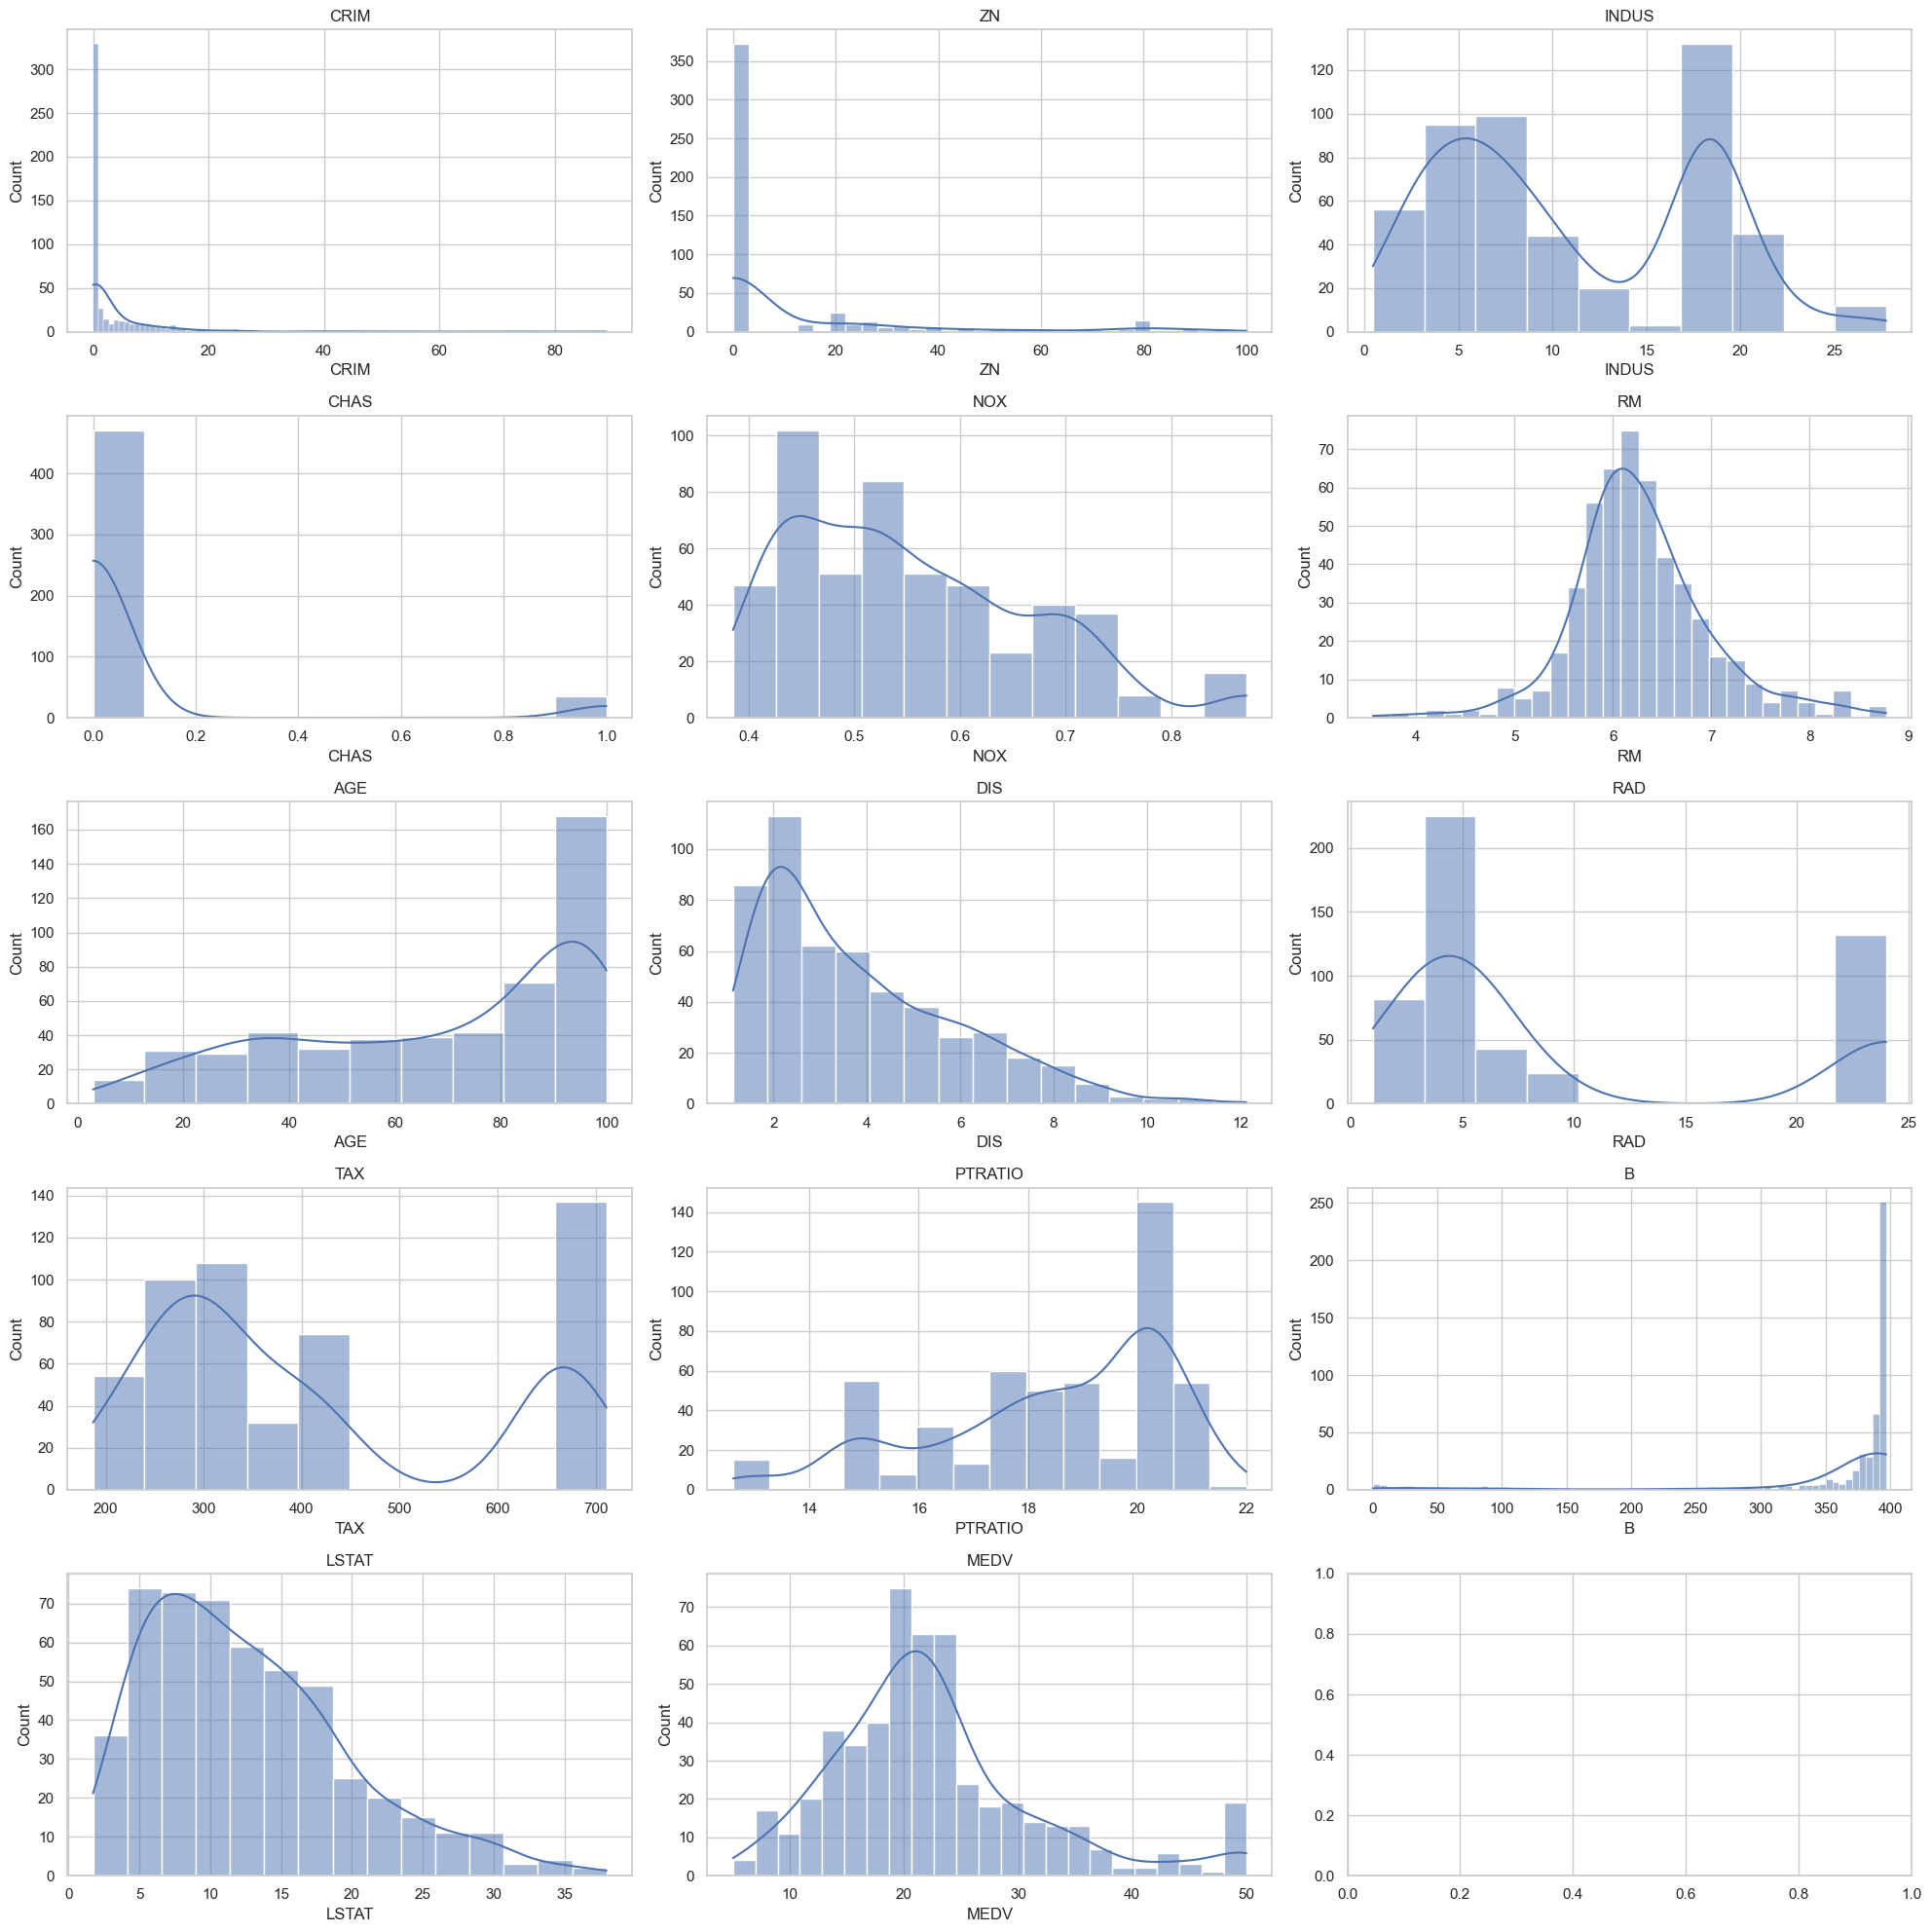

In [58]:
#checking distributions of various features
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(20, 20))

columns = df.columns
index = 0

for i in range(5):
    for j in range(3):
        if index < len(columns):
            sns.histplot(df[columns[index]], kde=True, ax=axes[i, j])
            axes[i, j].set_title(columns[index])
            index += 1

plt.tight_layout()
plt.show()

# Transforming the 'MEDV'- target variable into categorical variable

In [59]:
# Creating three categories: 'low', 'medium', 'high'
medv_bins = [df['MEDV'].min(), np.percentile(df['MEDV'], 33), np.percentile(df['MEDV'], 66), df['MEDV'].max()]
medv_labels = ['low', 'medium', 'high']
df['MEDV_category'] = pd.cut(df['MEDV'], bins=medv_bins, labels=medv_labels, include_lowest=True)

# Checking the distribution of the new categorical target variable
medv_category_distribution = df['MEDV_category'].value_counts()

medv_category_distribution

MEDV_category
high      172
low       167
medium    167
Name: count, dtype: int64

# Encoding the Data 

In [60]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV', 'MEDV_category'],
      dtype='object')

In [61]:
# One-Hot Encoding of 'RAD'
encoder = OneHotEncoder(sparse=False)
rad_encoded = encoder.fit_transform(df[['RAD']])

# Creating a DataFrame from the encoded 'RAD'
rad_encoded_df = pd.DataFrame(rad_encoded, columns=[f"RAD_{int(i)}" for i in encoder.categories_[0]])

# Concatenating the new one-hot encoded columns to the original dataset
data_encoded = pd.concat([df.drop(['RAD', 'MEDV'], axis=1), rad_encoded_df], axis=1)

# Splitting the data into features (X) and target variable (y)
X = data_encoded.drop('MEDV_category', axis=1)
y = data_encoded['MEDV_category']

# Standardization and normalization

In [62]:
# Standardizing the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Normalizing the data
normalizer = Normalizer()
X_train_normalized = normalizer.fit_transform(X_train_scaled)
X_test_normalized = normalizer.transform(X_test_scaled)

# Splitting into testing and training sets

In [63]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.head()  # Displaying the first few rows of the training features for verification

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,TAX,PTRATIO,...,LSTAT,RAD_1,RAD_2,RAD_3,RAD_4,RAD_5,RAD_6,RAD_7,RAD_8,RAD_24
477,15.02340,0.0,18.10,0,0.6140,5.304,97.3,2.1007,666.0,20.2,...,24.91,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
15,0.62739,0.0,8.14,0,0.5380,5.834,56.5,4.4986,307.0,21.0,...,8.47,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
332,0.03466,35.0,6.06,0,0.4379,6.031,23.3,6.6407,304.0,16.9,...,7.83,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
423,7.05042,0.0,18.10,0,0.6140,6.103,85.1,2.0218,666.0,20.2,...,23.29,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
19,0.72580,0.0,8.14,0,0.5380,5.727,69.5,3.7965,307.0,21.0,...,11.28,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


# compiling and intiating the  model

In [64]:
dt_classifier_normalized = DecisionTreeClassifier(random_state=42)
dt_classifier_normalized.fit(X_train_normalized, y_train)

DecisionTreeClassifier(random_state=42)

In [65]:
y_pred_normalized = dt_classifier_normalized.predict(X_test_normalized)
y_pred_normalized

array(['high', 'high', 'low', 'high', 'low', 'medium', 'medium', 'low',
       'medium', 'low', 'low', 'low', 'low', 'medium', 'low', 'medium',
       'medium', 'low', 'high', 'low', 'medium', 'high', 'low', 'medium',
       'medium', 'medium', 'medium', 'low', 'medium', 'medium', 'medium',
       'medium', 'low', 'medium', 'medium', 'low', 'high', 'medium',
       'medium', 'medium', 'medium', 'high', 'high', 'low', 'medium',
       'low', 'low', 'medium', 'medium', 'high', 'medium', 'high',
       'medium', 'high', 'high', 'medium', 'low', 'high', 'medium',
       'medium', 'high', 'high', 'high', 'low', 'high', 'medium', 'low',
       'medium', 'high', 'low', 'medium', 'high', 'low', 'high', 'medium',
       'low', 'medium', 'high', 'low', 'low', 'medium', 'low', 'medium',
       'low', 'medium', 'high', 'low', 'medium', 'medium', 'low',
       'medium', 'low', 'medium', 'low', 'medium', 'medium', 'high',
       'low', 'low', 'low', 'medium', 'medium'], dtype=object)

In [66]:
from sklearn.metrics import classification_report
# Evaluating the classifier
classification_rep_normalized = classification_report(y_test, y_pred_normalized)
confusion_mat_normalized = confusion_matrix(y_test, y_pred_normalized)
confusion_mat_normalized

array([[21,  0, 10],
       [ 0, 30,  6],
       [ 2,  4, 29]], dtype=int64)

In [67]:
classification_rep_normalized

'              precision    recall  f1-score   support\n\n        high       0.91      0.68      0.78        31\n         low       0.88      0.83      0.86        36\n      medium       0.64      0.83      0.73        35\n\n    accuracy                           0.78       102\n   macro avg       0.81      0.78      0.79       102\nweighted avg       0.81      0.78      0.79       102\n'